In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets

In [2]:
iris = datasets.load_iris()
X = iris.data[:, :2]
Y = (iris.target != 0) * 1
Y = Y[:, np.newaxis]

X.shape, Y.shape

((150, 2), (150, 1))

In [35]:
class LogisticRegression:
    
    def __init__(self, lr=1e-3, n_iter=5000):
        self.lr = lr
        self.n_iter = n_iter
        
    def fit(self, X, Y):
        X = np.concatenate((np.ones((len(X),1)), X), axis=1)
        weights = self.init_weights(X.shape[-1])
        print(X.shape, Y.shape)
        print(weights.shape)
        
        for i in range(self.n_iter):
            y_pred, loss, weights = self.step(X, Y, weights)
            
            if i % 500 == 0:
                print('iter: {}, loss: {:.2f}'.format(i, loss))
                
        return weights
        
    def init_weights(self, dim):
        weights = np.random.normal(loc=0.0, scale=1.0, size=(dim,1))
        weights[0] = 0
        return weights
        
    def step(self, X, y_true, weights):
        a = np.dot(X, weights)
        y_pred = sigmoid(a)
        loss = logistic_loss(y_true, y_pred)
        der = der_logistic_loss(X, y_true, y_pred)
        weights = weights - self.lr * der
        return y_pred, loss, weights
        

def sigmoid(a):
    return (1/(1+np.exp(-a)))

def der_logistic_loss(X, y_true, y_pred):
    der = np.dot(X.T, y_pred - y_true)
    return der
    
def logistic_loss(y_true, y_pred):
    loss = -np.mean(y_true * np.log(y_pred) + (1-y_true) * np.log(1-y_pred))
    return loss
    
def predict(X, weights):
    X = np.concatenate((np.ones((len(X), 1)), X), axis=1)
    pred = np.dot(X, weights)
    return pred

In [36]:
log_reg = LogisticRegression()

In [40]:
weights = log_reg.fit(X, Y)

(150, 3) (150, 1)
(3, 1)
iter: 0, loss: 3.08
iter: 500, loss: 0.10
iter: 1000, loss: 0.07
iter: 1500, loss: 0.06
iter: 2000, loss: 0.05
iter: 2500, loss: 0.05
iter: 3000, loss: 0.04
iter: 3500, loss: 0.04
iter: 4000, loss: 0.04
iter: 4500, loss: 0.04


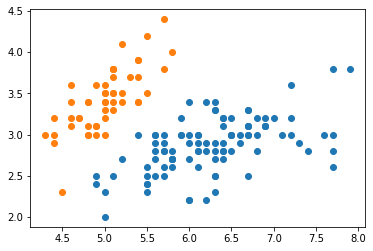

In [8]:
plt.scatter(X[Y[:,0]==1][:,0], X[Y[:,0]==1][:,1])
plt.scatter(X[Y[:,0]==0][:,0], X[Y[:,0]==0][:,1])

In [46]:
y_pred = predict(X, weights)
y_pred = (y_pred >= 0.5)

In [47]:
y_pred.shape

(150, 1)

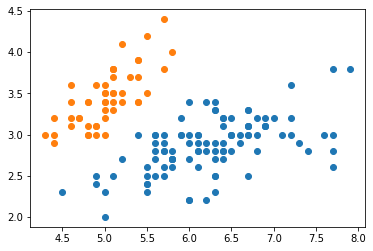

In [48]:
plt.scatter(X[y_pred[:,0]==1][:,0], X[y_pred[:,0]==1][:,1])
plt.scatter(X[y_pred[:,0]==0][:,0], X[y_pred[:,0]==0][:,1])